In [58]:
# Importing all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1000)>


False

In [59]:
df = pd.read_csv("fake_job_postings.csv", engine='python')
print(df.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [61]:
# was checking either the salary range matters for fake and real jobs
# but it does not matter
# both the real and fake jobs have almost same salary range
non_nan_salaries = df[(df['salary_range'].notna()) & (df['fraudulent'] == 1)]

(non_nan_salaries.head())


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
357,358,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,NaN,1
493,494,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1
628,629,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1


In [62]:
print(df.describe())

             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [63]:
# so we decided to drop salary range since no need for it
# job id is also useless
df.drop(['job_id', 'salary_range'], axis=1, inplace=True)
print(df.head())

                                       title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, locat

In [64]:
df.fillna('', inplace=True)

In [65]:
print(df.isna().sum())

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64



In [66]:
def clean_text(text, preserve_fraud_signals=True):
    # Parse HTML
    soup = BeautifulSoup(text, "html.parser")
    raw_text = soup.get_text()
    
    fraud_signals = []
    
    # fraud indicators
    if preserve_fraud_signals:
        # URLs and emails
        fraud_signals.append('has_url' if re.search(r'http[s]?://|www\.', raw_text) else 'no_url')
        fraud_signals.append('has_email' if re.search(r'\S+@\S+\.\S+', raw_text) else 'no_email')
        
        # Phone numbers
        fraud_signals.append('has_phone' if re.search(r'\d{10,}|\(\d{3}\)\s*\d{3}[-.\s]?\d{4}|\d{3}[-.\s]\d{3}[-.\s]\d{4}', raw_text) else 'no_phone')
        
        # Money/salary mentions
        fraud_signals.append('has_money' if re.search(r'\$\d+|\d+\s*(dollar|usd|euro|£|€)|earn|income|salary|pay', raw_text, re.I) else 'no_money')
        
        # Urgency indicators
        exclamation_count = len(re.findall(r'!', raw_text))
        fraud_signals.append('high_urgency' if exclamation_count > 3 else 'low_urgency')
        
        # scam keywords
        scam_keywords = ['immediate', 'urgent', 'hurry', 'limited', 'guaranteed', 'no experience', 'work from home', 'easy money']
        has_scam_words = any(kw in raw_text.lower() for kw in scam_keywords)
        fraud_signals.append('has_scam_words' if has_scam_words else 'no_scam_words')


    # Remove text in square brackets
    text = re.sub(r'\[[^]]*\]', '', raw_text)
    
    # Remove any character that is not a letter and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

    # Remove stopwords like 'the', 'a', 'is', 'and' etc
    stop = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    # Append fraud signals as features
    if preserve_fraud_signals and fraud_signals:
        text = text + ' ' + ' '.join(fraud_signals)

    return text


TEXT FEATURES:
  title                     | AUC: 0.9016 | Acc: 0.8535 | F1: 0.3417
  location                  | AUC: 0.8201 | Acc: 0.7192 | F1: 0.2070
  department                | AUC: 0.6970 | Acc: 0.9139 | F1: 0.2736
  company_profile           | AUC: 0.9410 | Acc: 0.8456 | F1: 0.3826
  description               | AUC: 0.9447 | Acc: 0.9072 | F1: 0.4662
  salary_range              | AUC: 0.5004 | Acc: 0.0492 | F1: 0.0924
  requirements              | AUC: 0.8934 | Acc: 0.7609 | F1: 0.2546
  benefits                  | AUC: 0.8613 | Acc: 0.5587 | F1: 0.1695
  employment_type           | AUC: 0.5600 | Acc: 0.7260 | F1: 0.1042
  required_experience       | AUC: 0.5883 | Acc: 0.4214 | F1: 0.1124
  required_education        | AUC: 0.6318 | Acc: 0.4245 | F1: 0.1160
  industry                  | AUC: 0.7731 | Acc: 0.5677 | F1: 0.1533
  function                  | AUC: 0.6818 | Acc: 0.4284 | F1: 0.1265

BINARY FEATURES:
  telecommuting             | AUC: 0.5081 | Acc: 0.9097 | F1: 0.0638


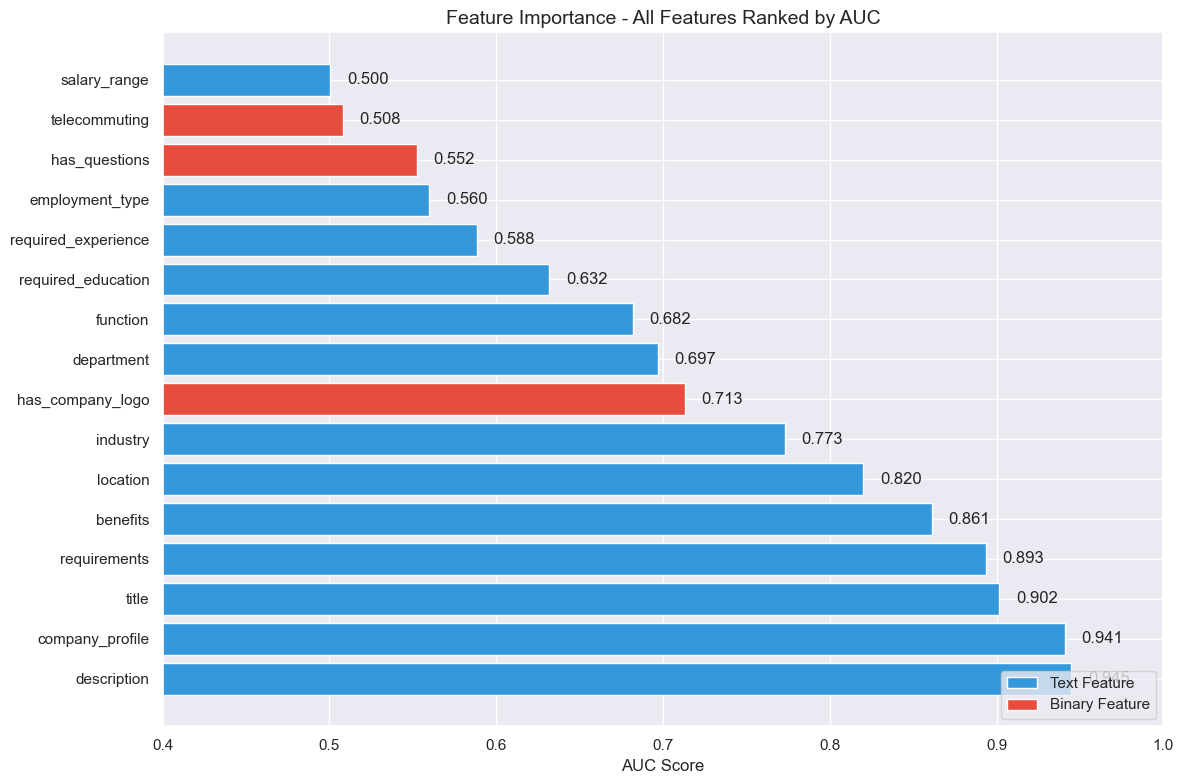


TOP 7 IMPORTANT FEATURES:
  1. description (Text) - AUC: 0.9447
  2. company_profile (Text) - AUC: 0.9410
  3. title (Text) - AUC: 0.9016
  4. requirements (Text) - AUC: 0.8934
  5. benefits (Text) - AUC: 0.8613
  6. location (Text) - AUC: 0.8201
  7. industry (Text) - AUC: 0.7731


In [67]:

df_fresh = pd.read_csv("fake_job_postings.csv", engine='python')

# Separate features by type
text_features = ['title', 'location', 'department', 'company_profile', 
                 'description', 'salary_range', 'requirements', 'benefits', 
                 'employment_type', 'required_experience', 'required_education', 
                 'industry', 'function']

binary_features = ['telecommuting', 'has_company_logo', 'has_questions']

results = []

# Analyze TEXT features 
print("\nTEXT FEATURES:")

df_fresh.fillna('', inplace=True)

for feature in text_features:
    X = df_fresh[feature].apply(clean_text)
    y = df_fresh['fraudulent']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    tfidf = TfidfVectorizer(max_features=1000, min_df=5)
    X_train_vec = tfidf.fit_transform(X_train)
    X_test_vec = tfidf.transform(X_test)
    
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    lr.fit(X_train_vec, y_train)
    
    y_pred = lr.predict(X_test_vec)
    y_pred_proba = lr.predict_proba(X_test_vec)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Feature': feature,
        'Type': 'Text',
        'Accuracy': acc,
        'AUC': auc,
        'F1-Score': f1
    })
    print(f"  {feature:25} | AUC: {auc:.4f} | Acc: {acc:.4f} | F1: {f1:.4f}")

# BINARY features
print("\nBINARY FEATURES:")

for feature in binary_features:
    X_feat = df_fresh[[feature]].values
    y_feat = df_fresh['fraudulent']
    
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
        X_feat, y_feat, test_size=0.2, random_state=42, stratify=y_feat
    )
    
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    lr.fit(X_train_f, y_train_f)
    
    y_pred = lr.predict(X_test_f)
    y_pred_proba = lr.predict_proba(X_test_f)[:, 1]
    
    acc = accuracy_score(y_test_f, y_pred)
    auc = roc_auc_score(y_test_f, y_pred_proba)
    f1 = f1_score(y_test_f, y_pred)
    
    results.append({
        'Feature': feature,
        'Type': 'Binary',
        'Accuracy': acc,
        'AUC': auc,
        'F1-Score': f1
    })
    print(f"  {feature:25} | AUC: {auc:.4f} | Acc: {acc:.4f} | F1: {f1:.4f}")

# Create and sort results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('AUC', ascending=False).reset_index(drop=True)

# Final Ranking
print("\n\n FINAL RANKING by AUC")
print(results_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#e74c3c' if t == 'Binary' else '#3498db' for t in results_df['Type']]
bars = ax.barh(results_df['Feature'], results_df['AUC'], color=colors)
ax.set_xlabel('AUC Score', fontsize=12)
ax.set_title('Feature Importance - All Features Ranked by AUC', fontsize=14)
ax.set_xlim(0.4, 1.0)

# Add value labels
for i, (bar, auc) in enumerate(zip(bars, results_df['AUC'])):
    ax.text(auc + 0.01, bar.get_y() + bar.get_height()/2, f'{auc:.3f}', va='center')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', label='Text Feature'),
                   Patch(facecolor='#e74c3c', label='Binary Feature')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Top 7
print("\nTOP 7 IMPORTANT FEATURES:")
for i, row in results_df.head(7).iterrows():
    print(f"  {i+1}. {row['Feature']} ({row['Type']}) - AUC: {row['AUC']:.4f}")

In [68]:
# since the top most features are description, title, requirements, company_profile, benefits

print("start")

# Convert has_company_logo to text (Yes/No)
df['logo_text'] = df['has_company_logo'].apply(lambda x: 'company has logo yes' if x == 1 else 'company has logo no')


df['text'] = df[['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'logo_text']].agg(' '.join, axis=1)

print(df[['text', 'fraudulent']].head())
df['text'] = df['text'].apply(clean_text)

print("end")

start
                                                text  fraudulent
0  Marketing Intern US, NY, New York We're Food52...           0
1  Customer Service - Cloud Video Production NZ, ...           0
2  Commissioning Machinery Assistant (CMA) US, IA...           0
3  Account Executive - Washington DC US, DC, Wash...           0
4  Bill Review Manager US, FL, Fort Worth SpotSou...           0
end


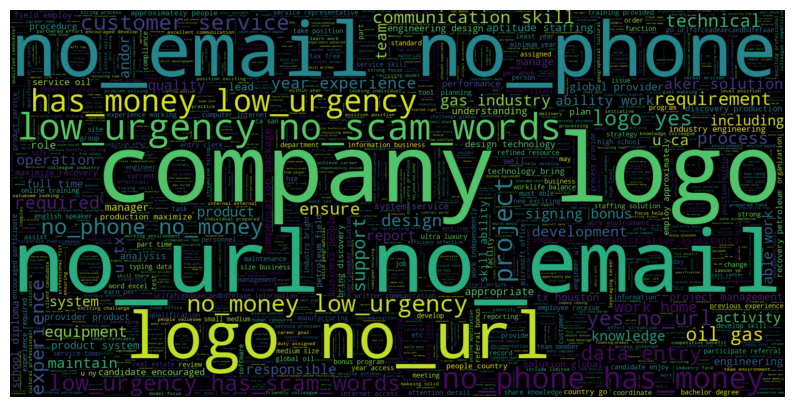

done


In [69]:
# TO check the high frequency of the fraudulent data - the fake job
plt.figure(figsize=(10, 6))
wc = WordCloud(max_words=3000, width=1600, height=800).generate(" ".join(df[df.fraudulent == 1].text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

print("done")

(np.float64(-0.5), np.float64(1599.5), np.float64(799.5), np.float64(-0.5))

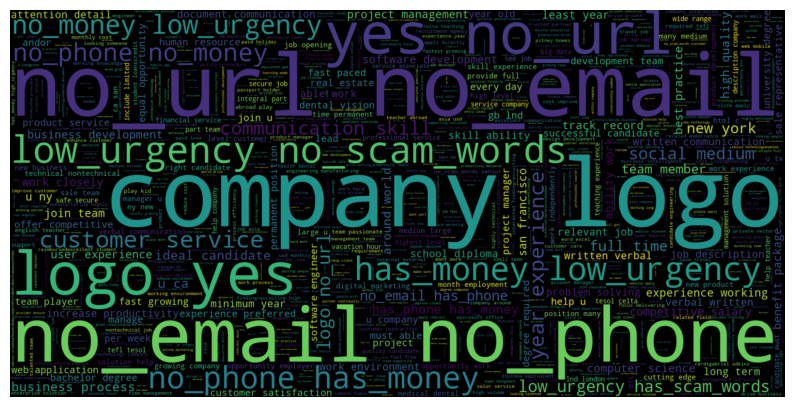

In [70]:
# to check the high frequency of the correct job description
plt.figure(figsize=(10, 6))
wc = WordCloud(max_words=3000, width=1600, height=800).generate(" ".join(df[df.fraudulent == 0].text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

<Axes: xlabel='fraudulent', ylabel='count'>

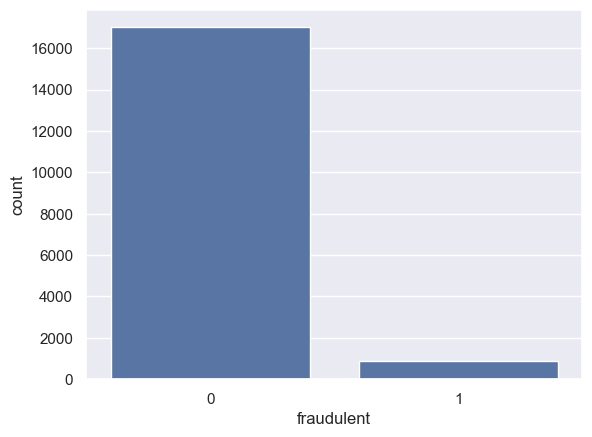

In [71]:
sns.set(style="darkgrid")
sns.countplot(x='fraudulent', data=df)

In [72]:
# equal distribution of testing and training datasets, focusing on fraudulents
X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set: {X_train.shape[0]}  samples: {y_train.mean():.2%} fraud")
print(f"Test set: {X_test.shape[0]}  samples: {y_test.mean():.2%} fraud")

Train set: 14304  samples: 4.84% fraud
Test set: 3576  samples: 4.84% fraud


In [73]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (14304, 5000)
Shape of X_test_tfidf: (3576, 5000)


In [75]:
# Simple, independent Logistic Regression 
from sklearn.feature_extraction.text import TfidfVectorizer as _TF
from sklearn.linear_model import LogisticRegression as _LR
from sklearn.metrics import classification_report as _crep, accuracy_score as _acc

# Prepare fresh inputs
_text_X = df['text'].values
_y = df['fraudulent'].values

# Train/test split
from sklearn.model_selection import train_test_split as _split
_Xtr, _Xte, _ytr, _yte = _split(_text_X, _y, test_size=0.2, random_state=42, stratify=_y)

# TF-IDF just for this model
_tf = _TF(max_features=5000, min_df=5)
_Xtrv = _tf.fit_transform(_Xtr)
_Xtev = _tf.transform(_Xte)

# Balanced Logistic Regression
_lr = _LR(max_iter=1000, class_weight='balanced', random_state=42)
_lr.fit(_Xtrv, _ytr)

_pred = _lr.predict(_Xtev)
print(f" Accuracy: {_acc(_yte, _pred):.4f}")
print(" Classification Report:\n", _crep(_yte, _pred))

 Accuracy: 0.9670
 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      3403
           1       0.61      0.91      0.73       173

    accuracy                           0.97      3576
   macro avg       0.80      0.94      0.85      3576
weighted avg       0.98      0.97      0.97      3576



In [76]:
# Simple, independent Multinomial Naive Bayes 
from sklearn.feature_extraction.text import TfidfVectorizer as _TF
from sklearn.naive_bayes import MultinomialNB as _MNB
from sklearn.metrics import classification_report as _crep, accuracy_score as _acc
from sklearn.model_selection import train_test_split as _split

_text_X = df['text'].values
_y = df['fraudulent'].values

_Xtr, _Xte, _ytr, _yte = _split(_text_X, _y, test_size=0.2, random_state=42, stratify=_y)

_tf = _TF(max_features=5000, min_df=5)
_Xtrv = _tf.fit_transform(_Xtr)
_Xtev = _tf.transform(_Xte)

_nb = _MNB()
_nb.fit(_Xtrv, _ytr)

_pred = _nb.predict(_Xtev)
print(f" Accuracy: {_acc(_yte, _pred):.4f}")
print(" Classification Report:\n", _crep(_yte, _pred))

 Accuracy: 0.9676
 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       1.00      0.33      0.50       173

    accuracy                           0.97      3576
   macro avg       0.98      0.66      0.74      3576
weighted avg       0.97      0.97      0.96      3576



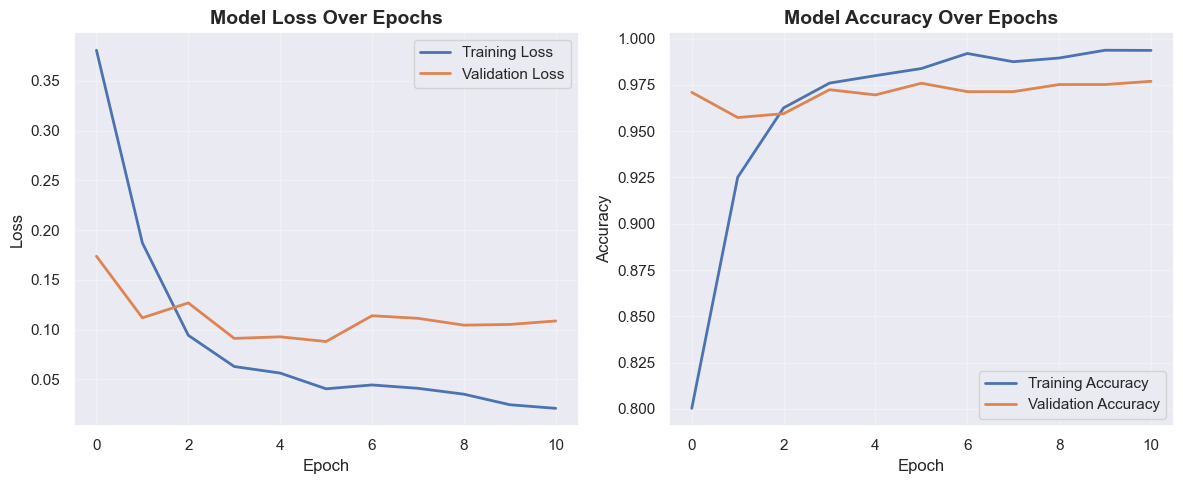


Final Training Loss: 0.0207
Final Validation Loss: 0.1086
Final Training Accuracy: 0.9936
Final Validation Accuracy: 0.9769


In [77]:
# trainign and validation loss plot
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\nFinal Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Test Accuracy: 0.9818

 OPTIMAL THRESHOLD: 0.7218
 Precision=0.8650, Recall=0.8150, F1=0.8393

 Comparison of thresholds:
Threshold 0.50: Precision=0.7935, Recall=0.8439, F1=0.8179, TP=146, FN=27
Threshold 0.72: Precision=0.8650, Recall=0.8150, F1=0.8393, TP=141, FN=32
Threshold 0.30: Precision=0.7273, Recall=0.8786, F1=0.7958, TP=152, FN=21
Threshold 0.40: Precision=0.7590, Recall=0.8555, F1=0.8043, TP=148, FN=25

 Using optimal threshold: 0.7218

Confusion Matrix:
[[3381   22]
 [  32  141]]


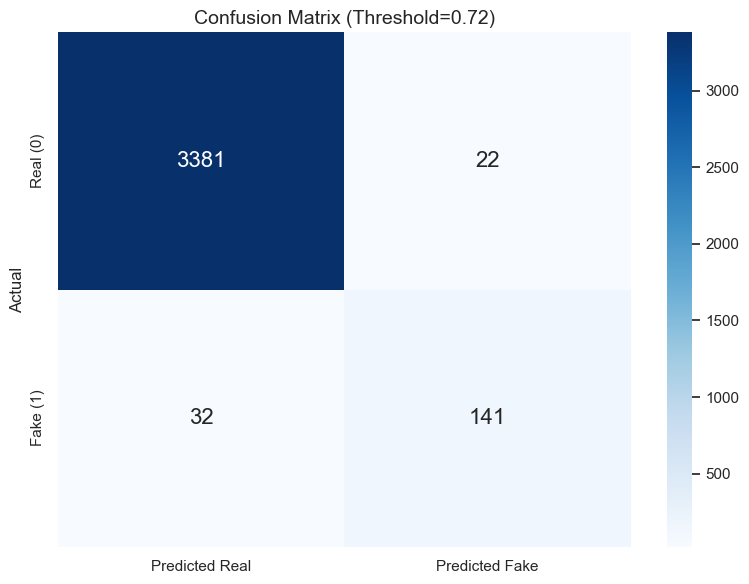


💾 Save this threshold in your API: 0.7218


In [78]:
# IMPROVED EVALUATION
from sklearn.metrics import precision_recall_curve, roc_curve

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Get prediction probabilities
y_pred_proba = model.predict(X_test_tfidf.toarray(), verbose=0).flatten()

# Find OPTIMAL threshold using Precision-Recall curve
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx] if optimal_idx < len(thresholds_pr) else 0.5

print(f"\n OPTIMAL THRESHOLD: {optimal_threshold:.4f}")
print(f" Precision={precisions[optimal_idx]:.4f}, Recall={recalls[optimal_idx]:.4f}, F1={f1_scores[optimal_idx]:.4f}")

# Compare with default 0.5 threshold
print("\n Comparison of thresholds:")

for thresh in [0.5, optimal_threshold, 0.3, 0.4]:
    y_pred_temp = (y_pred_proba >= thresh).astype(int)
    cm_temp = confusion_matrix(y_test, y_pred_temp)
    tn, fp, fn, tp = cm_temp.ravel()
    precision_temp = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_temp = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_temp = 2 * precision_temp * recall_temp / (precision_temp + recall_temp) if (precision_temp + recall_temp) > 0 else 0
    print(f"Threshold {thresh:.2f}: Precision={precision_temp:.4f}, Recall={recall_temp:.4f}, F1={f1_temp:.4f}, TP={tp}, FN={fn}")

# Use optimal threshold for final predictions
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

print(f"\n Using optimal threshold: {optimal_threshold:.4f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
cm_df = pd.DataFrame(cm, index=['Real (0)', 'Fake (1)'], columns=['Predicted Real', 'Predicted Fake'])
cm_df.index.name = 'Actual'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, cmap="Blues", annot=True, fmt='d', annot_kws={'size': 16})
plt.title(f'Confusion Matrix (Threshold={optimal_threshold:.2f})', fontsize=14)
plt.tight_layout()
plt.show()

# Save optimal threshold for API use
OPTIMAL_THRESHOLD = optimal_threshold
print(f"\n💾 Save this threshold in your API: {OPTIMAL_THRESHOLD:.4f}")

In [79]:

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.87      0.82      0.84       173

    accuracy                           0.98      3576
   macro avg       0.93      0.90      0.92      3576
weighted avg       0.98      0.98      0.98      3576



In [80]:
import joblib
import os

# Save the TF-IDF vectorizer
vectorizer_path = 'tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_path)
print(f"[INFO] TF-IDF Vectorizer saved to {vectorizer_path}")

# Save the Keras model
model_path = 'fake_job_detector_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")

#optimal threshold
print(f"   OPTIMAL_THRESHOLD = {OPTIMAL_THRESHOLD:.4f}")

# Auto-update the api.py file with the optimal threshold
api_path = 'api.py'
if os.path.exists(api_path):
    with open(api_path, 'r', encoding='utf-8') as f:
        api_content = f.read()
    
    # Replace the threshold value
    import re
    api_content = re.sub(
        r'OPTIMAL_THRESHOLD = [\d.]+',
        f'OPTIMAL_THRESHOLD = {OPTIMAL_THRESHOLD:.4f}',
        api_content
    )
    
    with open(api_path, 'w', encoding='utf-8') as f:
        f.write(api_content)
    
    print(f"✅ api.py automatically updated with OPTIMAL_THRESHOLD = {OPTIMAL_THRESHOLD:.4f}")

[INFO] TF-IDF Vectorizer saved to tfidf_vectorizer.pkl
Model saved to fake_job_detector_model.h5
   OPTIMAL_THRESHOLD = 0.7218
✅ api.py automatically updated with OPTIMAL_THRESHOLD = 0.7218


In [81]:
# # ============================================
# # TEST: Verify with suspicious job posting
# # ============================================

# test_title = "Data Entry Worker — Immediate Hiring! Earn up to $500/day"
# test_location = "Karachi, Pakistan"
# test_company_profile = "A global business expansion group that claims to partner with major companies, but provides no verifiable details, website, or registration number."
# test_description = "We urgently need workers to process data for international clients. No experience required. Just send your personal information and follow the simple tasks. Limited seats available. Hurry! Work from anywhere."
# test_requirements = "– No skills needed – Must be able to provide personal ID details – Must be available to start immediately – Internet connection required"
# test_benefits = "– Guaranteed daily income – Flexible hours – Exclusive rewards for fast responders"
# test_has_logo = "company has logo no"

# # Combine all text fields (matching the training data format)
# test_text = ' '.join([test_title, test_location, test_company_profile, test_description, test_requirements, test_benefits, test_has_logo])

# # Clean the text with fraud signal preservation
# test_text_cleaned = clean_text(test_text, preserve_fraud_signals=True)

# print("Cleaned text with fraud signals:")
# print(test_text_cleaned[-100:] + "...\n")

# # Vectorize using saved TF-IDF
# test_tfidf = tfidf_vectorizer.transform([test_text_cleaned])

# # Predict using the model with OPTIMAL threshold
# prediction_proba = model.predict(test_tfidf.toarray(), verbose=0)[0][0]
# prediction = 1 if prediction_proba >= OPTIMAL_THRESHOLD else 0

# print("=" * 60)
# print("PREDICTION RESULTS (with optimal threshold)")
# print("=" * 60)
# print(f"Fraud Probability: {prediction_proba:.4f} ({prediction_proba*100:.2f}%)")
# print(f"Real Probability: {1-prediction_proba:.4f} ({(1-prediction_proba)*100:.2f}%)")
# print(f"Optimal Threshold: {OPTIMAL_THRESHOLD:.4f}")
# print(f"\n🎯 Prediction: {'⚠️ FRAUDULENT' if prediction == 1 else '✓ LEGITIMATE'}")
# print("=" * 60)

# # Also test with a LEGITIMATE job posting
# print("\n\n--- Testing with a LEGITIMATE job posting ---")
# legit_title = "Senior Software Engineer"
# legit_location = "San Francisco, CA, USA"
# legit_company_profile = "Google LLC is a multinational technology company specializing in Internet-related services and products. Founded in 1998 by Larry Page and Sergey Brin."
# legit_description = "We are looking for a Senior Software Engineer to join our Cloud team. You will be responsible for designing and implementing scalable backend systems."
# legit_requirements = "- 5+ years of software development experience\n- Proficiency in Python, Java, or Go\n- Experience with distributed systems\n- BS/MS in Computer Science"
# legit_benefits = "- Competitive salary\n- Health, dental, and vision insurance\n- 401(k) matching\n- Flexible work arrangements"
# legit_has_logo = "company has logo yes"

# legit_text = ' '.join([legit_title, legit_location, legit_company_profile, legit_description, legit_requirements, legit_benefits, legit_has_logo])
# legit_text_cleaned = clean_text(legit_text, preserve_fraud_signals=True)
# legit_tfidf = tfidf_vectorizer.transform([legit_text_cleaned])
# legit_proba = model.predict(legit_tfidf.toarray(), verbose=0)[0][0]
# legit_pred = 1 if legit_proba >= OPTIMAL_THRESHOLD else 0

# print(f"Fraud Probability: {legit_proba:.4f} ({legit_proba*100:.2f}%)")
# print(f"🎯 Prediction: {'⚠️ FRAUDULENT' if legit_pred == 1 else '✓ LEGITIMATE'}")